In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import re
import random
import shutil


In [4]:
source_dir = "/home/hugo/CoursM1IASD/TER/data/imgs_cropped_X1.2/"
os.chdir(source_dir)

In [5]:
all_txt_names = glob.glob("wC_*.txt")
all_jpg_names = glob.glob("wC_*.jpg")

In [6]:
all_txt_names = glob.glob("wC_*.txt")
all_jpg_names = glob.glob("wC_*.jpg")
all_txt_names = " ".join(all_txt_names)
all_jpg_names = " ".join(all_jpg_names)

coords = dict()

for i in range(0,11400):
    try:
        path_to_file = re.findall("(wC\_" + str(i) + "\.txt)",all_txt_names).pop()
        path_to_img = re.findall("(wC\_" + str(i) + "\.jpg)",all_jpg_names).pop()
    except:
        continue

    if path_to_img:
        all_line = [line.rstrip() for line in open(path_to_file)]

        if len(all_line) == 2:
            number = re.findall("(?<=wC\_)(.*)(?=\.jpg)",path_to_img).pop()
            coords[int(number)] = dict()
            coords[int(number)]["head"] = np.array(all_line[0].split(" ")[1:3]).astype('float')
            coords[int(number)]["air"] = np.array(all_line[1].split(" ")[1:3]).astype('float')

In [8]:
img_index = np.array(list(coords.keys())).astype("int")
path = lambda num : source_dir + "wC_" + str(num) + ".jpg"

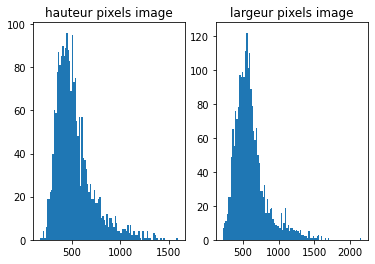

In [9]:
shape = []
for i in img_index:
    img = cv2.imread(path(i),cv2.IMREAD_COLOR)
    shape.append(list(img.shape))
shape = np.array(shape)  

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(shape[:,0],bins=100)
ax2.hist(shape[:,1],bins=100)
ax1.title.set_text("hauteur pixels image")
ax2.title.set_text("largeur pixels image")
plt.show()

1691


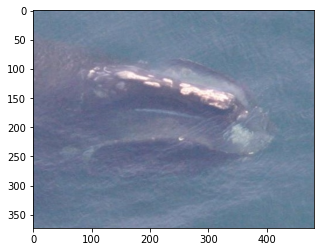

367 197


In [24]:
c = random.choice(img_index)
print(c)

img = cv2.imread(path(c),cv2.IMREAD_COLOR)
img = img[:,:,::-1]
print
plt.imshow(img)   
plt.show()
center_col = int(img.shape[1]*coords[c]['head'][0])
center_lin = int(img.shape[0]*coords[c]['head'][1])
print(center_col,center_lin)

In [11]:
x1,y1 = coords[c]["head"]
x2,y2 = coords[c]["air"]
a = x1 - x2
b = y1 - y2
r = np.sqrt(a*a + b*b)

alpha = -90 - np.arccos(np.abs(b)/r)*(180/np.pi) 
a,b

(0.449086, -0.18844999999999995)

In [12]:
img_0x = cv2.resize(img,None,fx=0.5, fy=0.5)
#plt.imshow(img_0x)

In [30]:
def find_angle(c):
    x1,y1 = coords[c]["head"]
    x2,y2 = coords[c]["air"]
    a = x1 - x2
    b = y1 - y2
    r = np.sqrt(a*a + b*b)

    if a >= 0 and b <= 0:
        alpha = 360 - np.arccos(a/r)*(180/np.pi) 
    if a <= 0 and b <= 0:
        alpha = 270 - np.arccos(np.abs(b)/r)*(180/np.pi) 
    if a <= 0 and b >= 0:
        alpha = 90 + np.arccos(np.abs(b)/r)*(180/np.pi) 
    if a >= 0 and b >= 0:
        alpha = np.arccos(a/r)*(180/np.pi)
    return alpha

def crop_rotated(rotated_img):
    i=0
    r = min(rotated_img.shape[0], rotated_img.shape[1])
    while len(rotated_img[rotated_img == 0]) > 10:
        print(i)
        i+=1
        h,w,_ = rotated_img.shape
        # on divise par un nombre pas trop petit pour garder un ratio correct pas trop gros non plus pour ne pas bien approcher l'image rogner
        x,y = max(1,h//r),max(1,w//r)
        print(x,y)
        rotated_img = rotated_img[x:-x,y:-y]
        print("ratio",rotated_img.shape[0]/rotated_img.shape[1])
    return rotated_img


0
1 1
ratio 0.7745302713987474
1
1 1
ratio 0.7735849056603774
2
1 1
ratio 0.7726315789473684
3
1 1
ratio 0.7716701902748414
4
1 1
ratio 0.7707006369426752
5
1 1
ratio 0.7697228144989339
6
1 1
ratio 0.7687366167023555
7
1 1
ratio 0.7677419354838709
8
1 1
ratio 0.7667386609071274
9
1 1
ratio 0.7657266811279827
10
1 1
ratio 0.7647058823529411
11
1 1
ratio 0.7636761487964989
12
1 1
ratio 0.7626373626373626
13
1 1
ratio 0.7615894039735099
14
1 1
ratio 0.7605321507760532
15
1 1
ratio 0.7594654788418709
16
1 1
ratio 0.7583892617449665
17
1 1
ratio 0.7573033707865169
18
1 1
ratio 0.7562076749435666
19
1 1
ratio 0.7551020408163265
20
1 1
ratio 0.7539863325740319
21
1 1
ratio 0.7528604118993135
22
1 1
ratio 0.7517241379310344
23
1 1
ratio 0.7505773672055427
24
1 1
ratio 0.7494199535962877
25
1 1
ratio 0.7482517482517482
26
1 1
ratio 0.747072599531616
27
1 1
ratio 0.7458823529411764
28
1 1
ratio 0.7446808510638298
29
1 1
ratio 0.7434679334916865
30
1 1
ratio 0.7422434367541766
31
1 1
ratio 0.7410

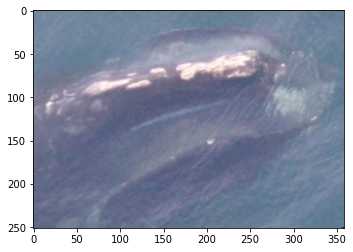

In [31]:
height, width = img.shape[:2]
center = (width/2, height/2) 
angle = find_angle(c)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
crop_rotated_img = crop_rotated(rotated_image)
len(crop_rotated_img[crop_rotated_img == 0]),len(rotated_image[rotated_image == 0])
plt.imshow(crop_rotated_img)